<a href="https://colab.research.google.com/github/Kidchris/Lesson/blob/master/Tensorflow_lesson_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lessons of tensorflow with Lazy programmer in Udemy

going through basics to advanced

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train, X_test = X_train/255.0 , X_test/255.0

In [4]:
X_train.shape

(60000, 28, 28)

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='softmax'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [17]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [18]:
result = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=70)

Epoch 1/70
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8053 - accuracy: 0.4486 - val_loss: 1.0778 - val_accuracy: 0.5857
Epoch 2/70
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1765 - accuracy: 0.5111 - val_loss: 0.7502 - val_accuracy: 0.7057
Epoch 3/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9746 - accuracy: 0.6035 - val_loss: 0.5215 - val_accuracy: 0.8523
Epoch 4/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8072 - accuracy: 0.6935 - val_loss: 0.4069 - val_accuracy: 0.8830
Epoch 5/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7362 - accuracy: 0.7294 - val_loss: 0.2802 - val_accuracy: 0.9644
Epoch 6/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6149 - accuracy: 0.7883 - val_loss: 0.2126 - val_accuracy: 0.9692
Epoch 7/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5586 - accuracy: 0.7978 - val_loss: 0.1936 - val_accuracy:

In [19]:
print('train : ', model.evaluate(X_train, y_train))
print('test : ', model.evaluate(X_test, y_test))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0109 - accuracy: 0.9973
train :  [0.010915052145719528, 0.9972666501998901]
313/313 [==============================] - 1s 2ms/step - loss: 0.1009 - accuracy: 0.9788
test :  [0.1008804589509964, 0.9787999987602234]


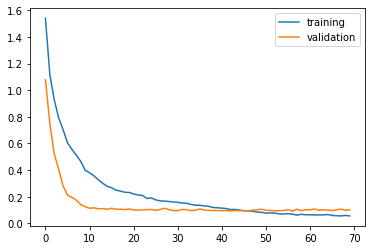

In [20]:
import matplotlib.pyplot as plt

plt.plot(result.history["loss"], label='training')
plt.plot(result.history["val_loss"], label='validation')
plt.legend()

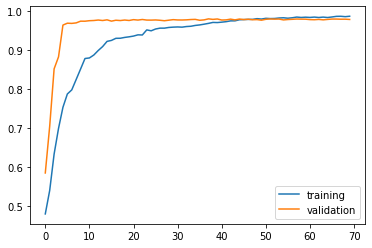

In [27]:
import matplotlib.pyplot as plt

plt.plot(result.history["accuracy"], label='training')
plt.plot(result.history["val_accuracy"], label='validation')
plt.legend()

In [28]:
y_pred = model.predict(X_test).argmax(axis=1)

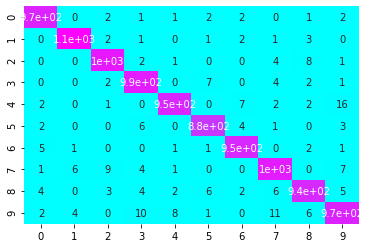

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
sb.heatmap(confusion_matrix(y_test, y_pred),cmap='cool' ,annot=True, cbar=False)


Text(0.5, 1.0, 'True label: 4 Predicted: 9')

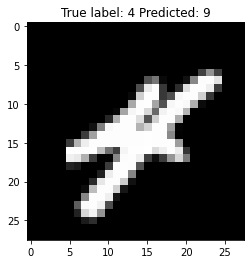

In [30]:
# Show some misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]))

In [31]:
model.save("Mnist.h5")

In [26]:
print(model)